# analysis_example

This notebook shows how to analyse the simulation data example from the ABCE Open Data Project.

View the dataset here: https://figshare.com/s/464885898d0041bfa8fd

View this notebook on GitHub here: https://github.com/building-energy/ABCE_Open_Data_Project/blob/main/datasets/3_EnergyPlus_simulation_data/analysis_example.ipynb

## Setup

In [1]:
import requests
import json
import pandas as pd 
from matplotlib import pyplot as plt 
import io

## Get CSV file from figshare

This downloads the EnergyPlus output CSV file directly from the Figshare data repository.

In [2]:
csv_download_url='https://figshare.com/ndownloader/files/35934071?private_link=464885898d0041bfa8fd'
response=requests.get(csv_download_url)
csv_text=response.text
csv_text.split('\n')[:6]

['Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Total Sky Cover [](Hourly),Environment:Site Opaque Sky Cover [](Hourly),Environment:Site Daylight Saving Time Status [](Daily),Environment:Site Day Type Index [](Daily),ZONE ONE:Zone Total Internal Latent Gain Energy [J](Hourly),TEST 352A:Other Equipment Total Heating Energy [J](Monthly),TEST 352 MINUS:Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Mean Radiant Temperature [C](Hourly),ZN001:WALL001:Surface Inside Face Temperature [C](Daily),ZN001:WALL001:Surface Outside Face Temperature [C](Daily),ZN001:WALL001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:WALL001:Surface Outside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:WALL002:Surface Inside Face Temperature [C](Daily),ZN001:WALL002:Surface Outside Face Temperature [C](Daily),ZN001:WALL002:Surface Inside Face Co

## Get metadata.json file from figshare

The CSV data is in CSV on the Web (CSVW) format and so there is an additional accompanying metadata file. The code below downloads this directly from the Figshare data repository.

In [3]:
metadata_json_download_url='https://figshare.com/ndownloader/files/36002498?private_link=464885898d0041bfa8fd'
response=requests.get(metadata_json_download_url)
metadata_text=response.text
metadata_dict=json.loads(metadata_text)
metadata_dict

{'@context': 'http://www.w3.org/ns/csvw',
 '@type': 'Table',
 'url': 'eplusout.csv',
 'dc:title': 'EnergyPlus simulation test',
 'dc:description': 'An EnergyPlus simulation of an office room in Sir Frank Gibb building, Loughborough University',
 'dc:creator': 'ABCE Open Research Team',
 'tableSchema': {'@type': 'Schema',
  'columns': [{'@type': 'Column',
    'titles': 'Date/Time',
    'dc:description': 'Date/Time',
    'schema:variableMeasured': 'Date/Time',
    'datatype': 'string',
    'rdfs:comment': 'The Date/Time column contains a non-standard date and time format which does match any of the CSVW data format options.'},
   {'@type': 'Column',
    'titles': 'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
    'dc:description': 'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
    'schema:variableMeasured': 'Environment:Site Outdoor Air Drybulb Temperature',
    'schema:unitText': 'C',
    'schema:duration': 'H1',
    'dc:references': {'@id': 'https://bi

## Create a parser for datetime strings in the CSV file

The Date/Time column in EnergyPlus output files is a non-standard format. This functions changes the Date/Time format from 'MM-dd HH:mm:ss' to 'yyyy-MM-dd HH:mm:ss' and changes the '24:00' readings to '00:00.

In [4]:
def parse_energyplus_datetime_string(st, year=2022):
    st=st.strip()
    month=int(st[0:2])
    day=int(st[3:5])
    hour=int(st[7:9])
    minute=int(st[10:12])
    second=(st[13:15])
    if not hour==24:
        dt=pd.Timestamp(year,month,day,hour,minute)
    else:
        hour=0
        dt=pd.Timestamp(year,month,day,hour,minute)
        dt+=pd.Timedelta('1 day')
    return dt

## Read data from CSV text

This reads the text from the downloaded CSV file into a Pandas DataFrame for further analysis.

In [5]:
df=pd.read_csv(io.StringIO(csv_text),
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string  #parses the date strings using the function defined above
              )
df.columns=df.columns.str.strip()
df.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Total Sky Cover [](Hourly),Environment:Site Opaque Sky Cover [](Hourly),Environment:Site Daylight Saving Time Status [](Daily),Environment:Site Day Type Index [](Daily),ZONE ONE:Zone Total Internal Latent Gain Energy [J](Hourly),TEST 352A:Other Equipment Total Heating Energy [J](Monthly),TEST 352 MINUS:Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Mean Radiant Temperature [C](Hourly),...,ZN001:FLR001:Surface Inside Face Temperature [C](Daily),ZN001:FLR001:Surface Outside Face Temperature [C](Daily),ZN001:FLR001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Inside Face Temperature [C](Daily),ZN001:ROOF001:Surface Outside Face Temperature [C](Daily),ZN001:ROOF001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Outside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZONE ONE:Zone Mean Air Temperature [C](Hourly),ZONE ONE:Zone Air Heat Balance Surface Convection Rate [W](Hourly),ZONE ONE:Zone Air Heat Balance Air Energy Storage Rate [W](Hourly)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2022-12-21 01:00:00,-15.5,1.250,1.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.210958,-0.035919,-0.035990
2022-12-21 02:00:00,-15.5,3.250,3.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211045,-0.035356,-0.035426
2022-12-21 03:00:00,-15.5,3.375,3.375,NaN,NaN,0.0,NaN,NaN,NaN,-18.208434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211130,-0.034802,-0.034871
2022-12-21 04:00:00,-15.5,1.125,1.125,NaN,NaN,0.0,NaN,NaN,NaN,-18.208520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211214,-0.034256,-0.034324
2022-12-21 05:00:00,-15.5,1.875,1.875,NaN,NaN,0.0,NaN,NaN,NaN,-18.208604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211297,-0.033719,-0.033786


## Analysis: Plot all variables with units degrees C and time interval of hourly

This is an example of analysis. The metadata file is used to determine the columns which have units of degrees C and which are measured in hourly intervals. 

These variables are then plotted as a time series graph.

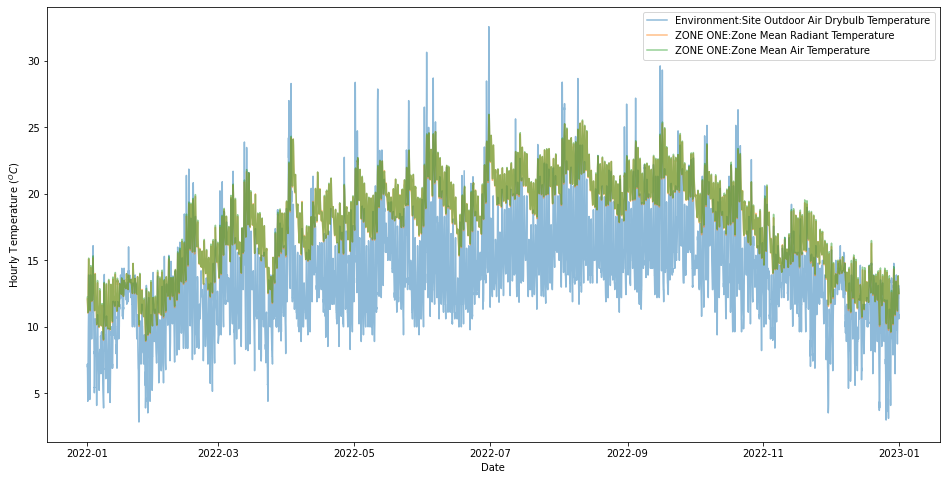

Figure X: Hourly temperatures vs. time for an EnergyPlus simulation.


In [6]:
fig, ax = plt.subplots(figsize=(16,8))
for i,x in enumerate(metadata_dict['tableSchema']['columns']):
    if x.get('http://purl.org/linked-data/sdmx/2009/attribute#unitMeasure',{}).get('@id',None)==\
            'http://qudt.org/vocab/unit/DEG_C':
        if x.get('schema:duration',None)=='H1':
            ax.plot(df[x['titles']][48:], alpha=0.5, label=x['schema:variableMeasured'])
ax.set_xlabel('Date')
ax.set_ylabel('Hourly Temperature ($^{O}C$)')
ax.legend()
plt.rcParams.update({'font.size': 16})
fig.savefig('time_series_plot.png')
plt.show()
print('Figure X: Hourly temperatures vs. time for an EnergyPlus simulation.')